 # Research of the best online courses
 

### Step 1. Import files and data preprocessing

Uploading a table from a computer to a cloud service.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./lesson.csv')
df

,name,cost_in_rubles,lesson_name,duration_in_week,projects,site
0,skill_factory,69000,data_analytic,24,4,https://skillfactory.ru/data-analytics
1,skillbox,95000,data_analytic,56,1,https://skillbox.ru/course/profession-data-ana...
2,yandex_praktikum,75000,data_analytic,24,3,https://praktikum.yandex.ru/profile/data-analyst/
3,netology,60000,system_analytic,72,6,https://netology.ru/programs/analytics-dwh#/
4,udemy,2290,power_bi,2,0,https://www.udemy.com/course/power-bi-v/
5,specialist,26950,power_bi,3,0,https://www.specialist.ru/course/m20780
6,specialist,39550,SQL,5,0,https://www.specialist.ru/course/m20761a
7,udemy,1790,SQL,1,0,https://www.udemy.com/course/sql-essentials-ru/
8,netology,96000,data_analytic,44,6,https://netology.ru/programs/data_analyst_ulti...
9,netology,84000,analytic_BI,44,6,https://netology.ru/programs/probusinessintell...


We visualize the table by the **'cost_in_rubles'** column.

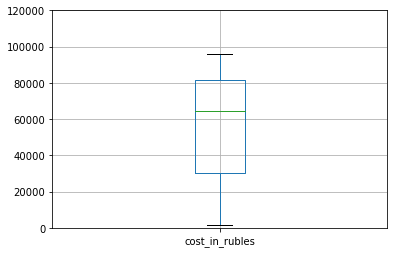

In [3]:
plt.ylim(0,120000)
df.boxplot(column='cost_in_rubles') 
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              10 non-null     object
 1   cost_in_rubles    10 non-null     int64 
 2   lesson_name       10 non-null     object
 3   duration_in_week  10 non-null     int64 
 4   projects          10 non-null     int64 
 5   site              10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Using the **df.info()** function, we learned that:
* tabel consists of 6 columns;
* in each columns of 10 entries;
* columns "name", "lesson_name", "site" is a type "object";
* columns "cost_in_rubles", "duration_in_week", "projects" is a type "int64".

In [5]:
df.isnull().sum()

name                0
cost_in_rubles      0
lesson_name         0
duration_in_week    0
projects            0
site                0
dtype: int64

In [6]:
df.isna().sum()

name                0
cost_in_rubles      0
lesson_name         0
duration_in_week    0
projects            0
site                0
dtype: int64

Using the **df.isnull().sum()** and **df.isna().sum()** function, we learned that:
* table doesn`t consist null values;
* table is convenient for further work.

### Step 2. Data analysis and comparison

For me, the main property of the course is its duration. 

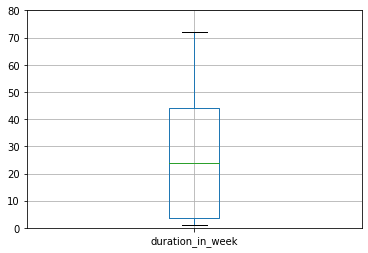

In [7]:
plt.ylim(0,80)
df.boxplot(column='duration_in_week') 
plt.show()

For this reason first of all I delete lines that do not fit the conditions:
**a duration of at least 4 weeks and no more than 80**.


Let`s write function for this.

In [8]:
df = df.loc[(df['duration_in_week'] <= 80)&(df['duration_in_week'] >= 4)]
df.reset_index()

,index,name,cost_in_rubles,lesson_name,duration_in_week,projects,site
0,0,skill_factory,69000,data_analytic,24,4,https://skillfactory.ru/data-analytics
1,1,skillbox,95000,data_analytic,56,1,https://skillbox.ru/course/profession-data-ana...
2,2,yandex_praktikum,75000,data_analytic,24,3,https://praktikum.yandex.ru/profile/data-analyst/
3,3,netology,60000,system_analytic,72,6,https://netology.ru/programs/analytics-dwh#/
4,6,specialist,39550,SQL,5,0,https://www.specialist.ru/course/m20761a
5,8,netology,96000,data_analytic,44,6,https://netology.ru/programs/data_analyst_ulti...
6,9,netology,84000,analytic_BI,44,6,https://netology.ru/programs/probusinessintell...


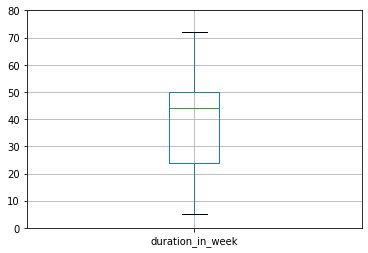

In [9]:
plt.ylim(0,80)
df.boxplot(column='duration_in_week') 
plt.show()

The number of projects was also an important factor. Sort the table in descending order of **projects**.

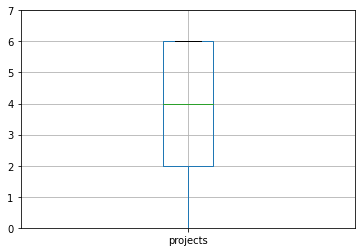

In [10]:
plt.ylim(0,7)
df.boxplot(column='projects') 
plt.show()

In [11]:
df = df.sort_values('projects', ascending = False)
df = df.loc[df['projects'] != 0]
df

,name,cost_in_rubles,lesson_name,duration_in_week,projects,site
3,netology,60000,system_analytic,72,6,https://netology.ru/programs/analytics-dwh#/
8,netology,96000,data_analytic,44,6,https://netology.ru/programs/data_analyst_ulti...
9,netology,84000,analytic_BI,44,6,https://netology.ru/programs/probusinessintell...
0,skill_factory,69000,data_analytic,24,4,https://skillfactory.ru/data-analytics
2,yandex_praktikum,75000,data_analytic,24,3,https://praktikum.yandex.ru/profile/data-analyst/
1,skillbox,95000,data_analytic,56,1,https://skillbox.ru/course/profession-data-ana...


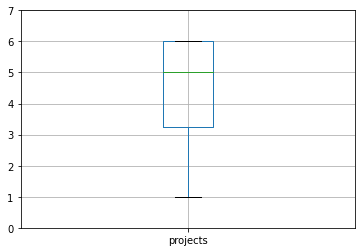

In [12]:
plt.ylim(0,7)
df.boxplot(column='projects') 
plt.show()

According to the criterion **'projects'**, won three courses from netology.

In [13]:
df.head(3)

,name,cost_in_rubles,lesson_name,duration_in_week,projects,site
3,netology,60000,system_analytic,72,6,https://netology.ru/programs/analytics-dwh#/
8,netology,96000,data_analytic,44,6,https://netology.ru/programs/data_analyst_ulti...
9,netology,84000,analytic_BI,44,6,https://netology.ru/programs/probusinessintell...


At this stage of the study we don`t need a column **'site'** so we delete it and create a new one - **'value_of_the_week'**.

In [14]:
df = df.drop(['site'], axis='columns')
df

,name,cost_in_rubles,lesson_name,duration_in_week,projects
3,netology,60000,system_analytic,72,6
8,netology,96000,data_analytic,44,6
9,netology,84000,analytic_BI,44,6
0,skill_factory,69000,data_analytic,24,4
2,yandex_praktikum,75000,data_analytic,24,3
1,skillbox,95000,data_analytic,56,1


In [15]:
df['value_of_the_week'] = df['cost_in_rubles'] / df['duration_in_week']
df = df.astype({'value_of_the_week': np.int64})
df

,name,cost_in_rubles,lesson_name,duration_in_week,projects,value_of_the_week
3,netology,60000,system_analytic,72,6,833
8,netology,96000,data_analytic,44,6,2181
9,netology,84000,analytic_BI,44,6,1909
0,skill_factory,69000,data_analytic,24,4,2875
2,yandex_praktikum,75000,data_analytic,24,3,3125
1,skillbox,95000,data_analytic,56,1,1696


Now we can compare rates by value.

In [16]:
df1 = df.head(3)
df1 = df1.sort_values('value_of_the_week', ascending = True)
df1 = df1.drop(['name','projects','cost_in_rubles'], axis='columns')
df1

,lesson_name,duration_in_week,value_of_the_week
3,system_analytic,72,833
9,analytic_BI,44,1909
8,data_analytic,44,2181


Сompare the rest of the courses and choose the best among them.

In [17]:
df2 = df.tail(3)
df2 = df2.drop(['lesson_name'], axis='columns')
df2 = df2.sort_values('value_of_the_week', ascending = True)
df2

,name,cost_in_rubles,duration_in_week,projects,value_of_the_week
1,skillbox,95000,56,1,1696
0,skill_factory,69000,24,4,2875
2,yandex_praktikum,75000,24,3,3125


### Step 3. Results and conclusions

We analyzed and identified the best courses comparing them on different factors.

According to the criterion **'projects'**, won three courses from netology.

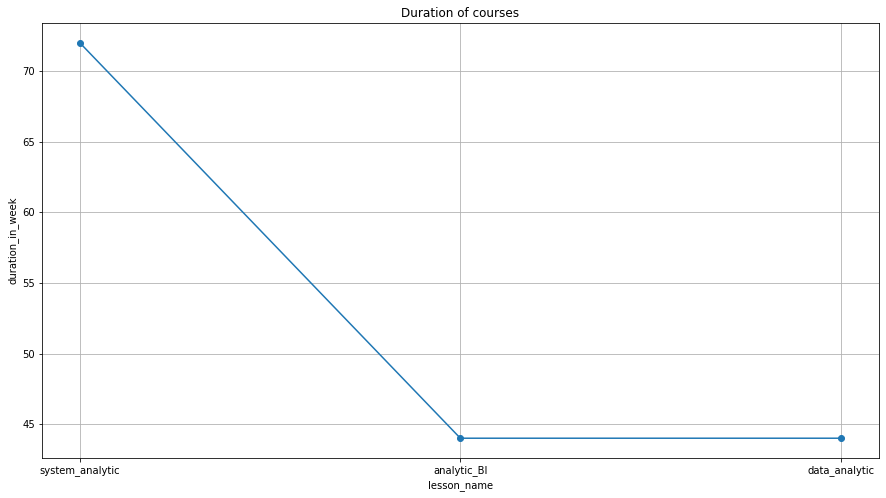

In [18]:
plt.figure(figsize=(15, 8))
x = df1['lesson_name']
y = df1['duration_in_week']
plt.title('Duration of courses') 
plt.xlabel('lesson_name') 
plt.ylabel('duration_in_week') 
plt.grid()      
plt.plot(x, y, "o-")

Thus we learned that:

* the duration of courses depends on the specialty of the course;
* specialty **"system analyst"** is the most difficult;
* more knowledge is given in the **"system analist"** specialty than in other specialties.

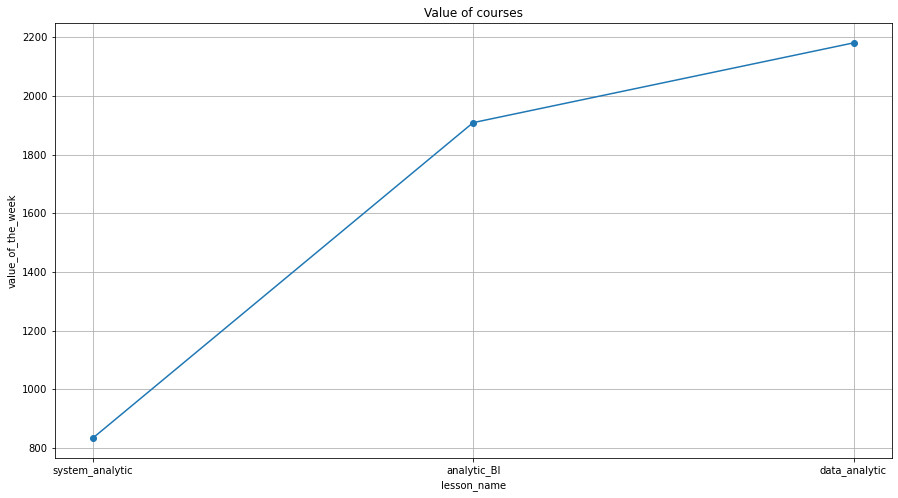

In [19]:
plt.figure(figsize=(15, 8))
x = df1['lesson_name']
y = df1['value_of_the_week']
plt.title('Value of courses') 
plt.xlabel('lesson_name') 
plt.ylabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o-")

We can draw such conclusions:
* the cost of courses depends on the specialty of the course;
* specialty **data analyst** is more popular than **BI analyst**.


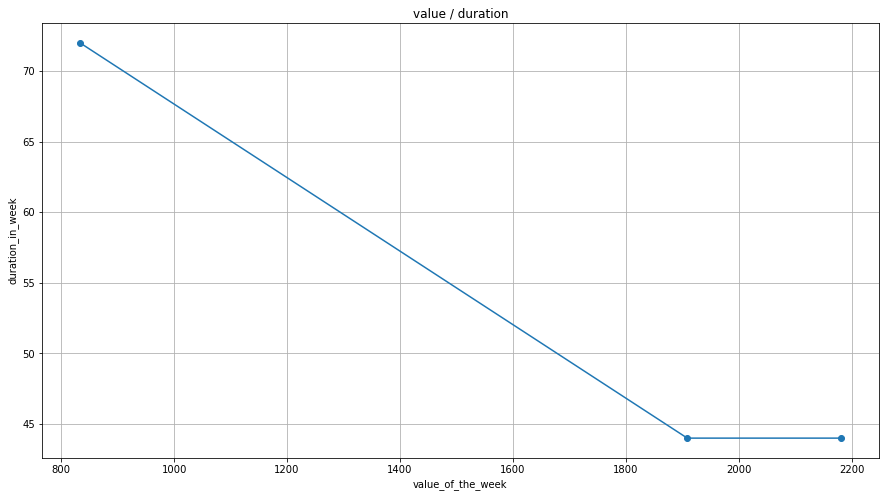

In [20]:
plt.figure(figsize=(15, 8))
y = df1['duration_in_week']
x = df1['value_of_the_week']
plt.title('value / duration') 
plt.ylabel('duration_in_week') 
plt.xlabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o-")

Thanks to the graph, we can see the correlation between **'value_of_the_week'** and **'duration_in_week'**. The longer the duration, the lower the cost.


Specialty of **"system analyst"** is the longest and cheapest.

### I think I would like to choose **"system analyst"** among these courses.

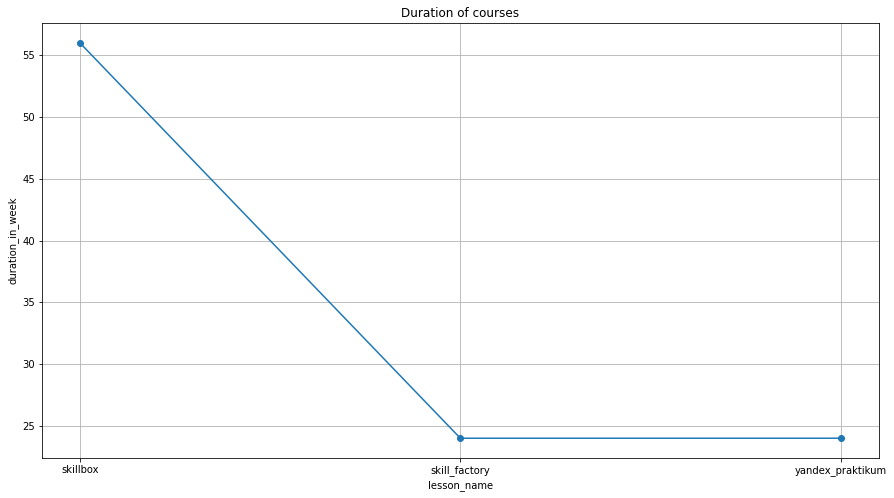

In [21]:
plt.figure(figsize=(15, 8))
x = df2['name']
y = df2['duration_in_week']
plt.title('Duration of courses') 
plt.xlabel('lesson_name') 
plt.ylabel('duration_in_week') 
plt.grid()      
plt.plot(x, y, "o-")

We can draw such conclusions:
* the **'skillbox'** course is the longest;
* courses **'skill factory'** and **'yandex praktikum'** have the same duration;
* in course **'skillbox'**, more knowledge is given.

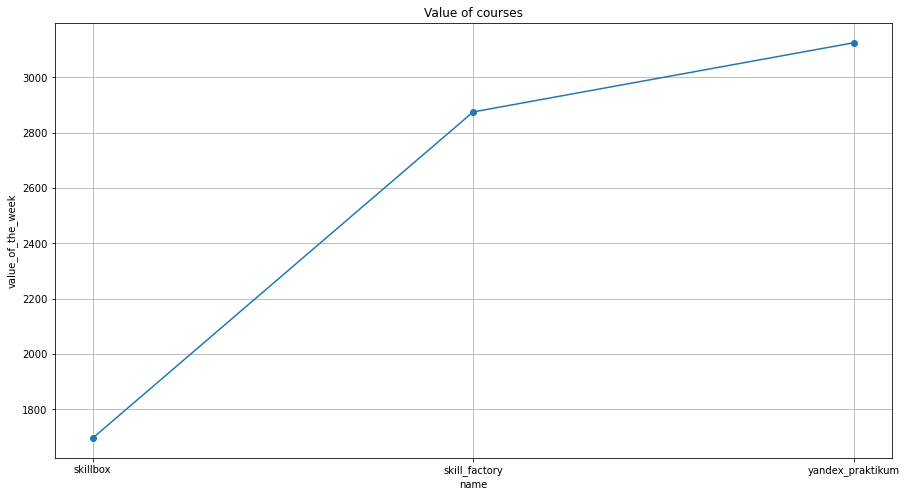

In [22]:
plt.figure(figsize=(15, 8))
x = df2['name']
y = df2['value_of_the_week']
plt.title('Value of courses') 
plt.xlabel('name') 
plt.ylabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o-")

Thus we learned that:
* courses **'yandex praktikum'** is the most expensive;
* courses **'yandex praktikum'** and **'skill factory'** cost twice as much as course **'skillbox'**.


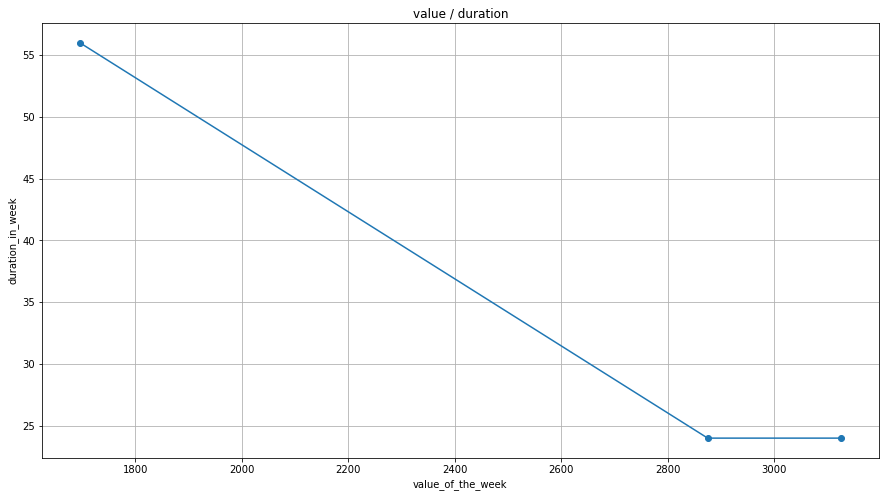

In [23]:
plt.figure(figsize=(15, 8))
y = df2['duration_in_week']
x = df2['value_of_the_week']
plt.title('value / duration') 
plt.ylabel('duration_in_week') 
plt.xlabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o-")

Thanks to the graph, we can see again the correlation between **'value_of_the_week'** and **'duration_in_week'**. The longer the duration, the lower the cost.


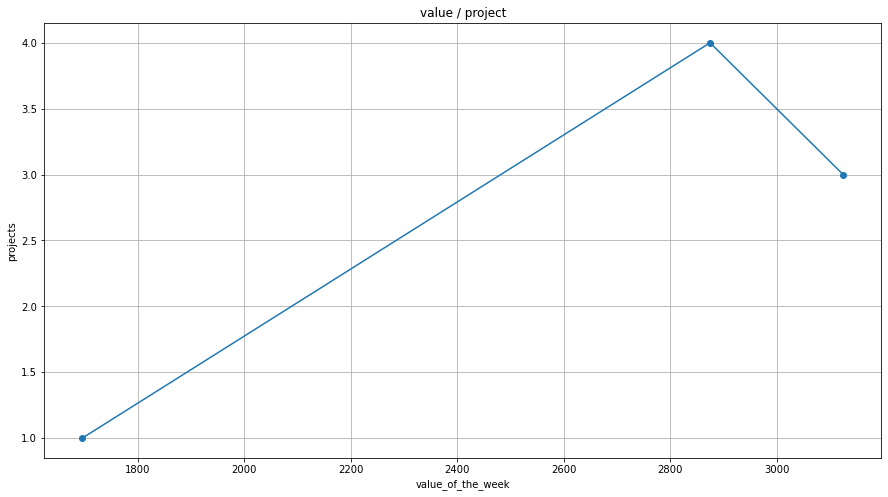

In [24]:
plt.figure(figsize=(15, 8))
y = df2['projects']
x = df2['value_of_the_week']
plt.title('value / project') 
plt.ylabel('projects') 
plt.xlabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o-")

Among this courses, I consider **'skill_factory'** the best.

### Among all the courses, we found a pattern: the longer the duration, the lower the cost.

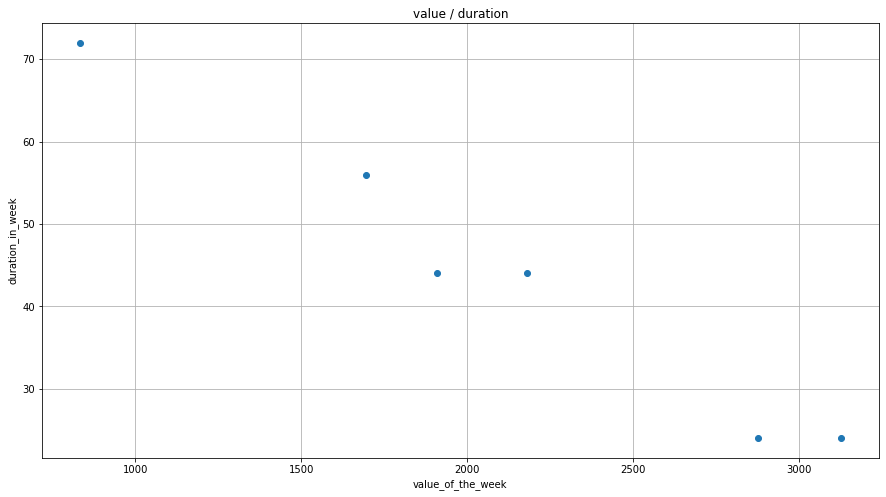

In [25]:
plt.figure(figsize=(15, 8))
y = df['duration_in_week']
x = df['value_of_the_week']
plt.title('value / duration') 
plt.ylabel('duration_in_week') 
plt.xlabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o")

### Among all the courses, we did not find a pattern between the number of projects and the cost.

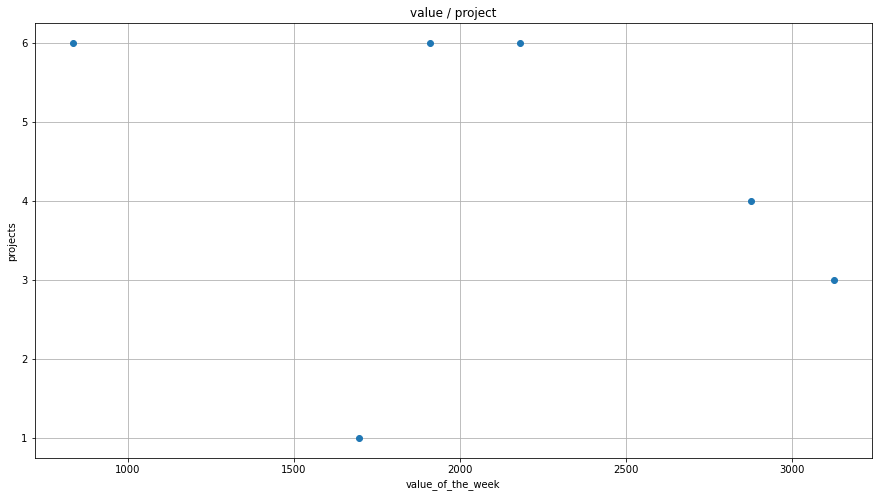

In [26]:
plt.figure(figsize=(15, 8))
y = df['projects']
x = df['value_of_the_week']
plt.title('value / project') 
plt.ylabel('projects') 
plt.xlabel('value_of_the_week') 
plt.grid()      
plt.plot(x, y, "o")

Among all the courses, the best in terms of the number of projects, cost and duration were courses **"system analyst"** from **Netology** and **"data analyst"** from **Skill factory**.

Thank you for watching and have a nice day :)

![](cat.jpg)